In [18]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

'/Users/alvarodda/zrive-ds-oliva/zrive-ds-4q23-olive/src/EDA_Parcels '

In [19]:
df = pd.read_parquet("muestreos_parcelas.parquet")

estados = ['estado_fenologico_1', 'estado_fenologico_2', 'estado_fenologico_3',
       'estado_fenologico_4', 'estado_fenologico_5', 'estado_fenologico_6',
       'estado_fenologico_7', 'estado_fenologico_8', 'estado_fenologico_9',
       'estado_fenologico_10', 'estado_fenologico_11', 'estado_fenologico_12',
       'estado_fenologico_13', 'estado_fenologico_14']

df_estados = df[estados]
df_estados.info()


<class 'pandas.core.frame.DataFrame'>
Index: 581793 entries, 0 to 581792
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   estado_fenologico_1   35816 non-null   float32
 1   estado_fenologico_2   62000 non-null   float32
 2   estado_fenologico_3   56106 non-null   float32
 3   estado_fenologico_4   43386 non-null   float32
 4   estado_fenologico_5   37543 non-null   float32
 5   estado_fenologico_6   40460 non-null   float32
 6   estado_fenologico_7   43052 non-null   float32
 7   estado_fenologico_8   43815 non-null   float32
 8   estado_fenologico_9   109202 non-null  float32
 9   estado_fenologico_10  243629 non-null  float32
 10  estado_fenologico_11  99547 non-null   float32
 11  estado_fenologico_12  70410 non-null   float32
 12  estado_fenologico_13  33154 non-null   float32
 13  estado_fenologico_14  7441 non-null    float32
dtypes: float32(14)
memory usage: 35.5 MB


In [20]:
df_missing_estados = df_estados.isnull().sum()/len(df)
df_missing_values_estados = pd.DataFrame({'Missing Percentage': df_missing_estados})
df_missing_values_estados.sort_values(by='Missing Percentage', ascending=False)

,Missing Percentage
estado_fenologico_14,0.987210
estado_fenologico_13,0.943014
estado_fenologico_1,0.938439
estado_fenologico_5,0.935470
estado_fenologico_6,0.930456
estado_fenologico_7,0.926001
estado_fenologico_4,0.925427
estado_fenologico_8,0.924690
estado_fenologico_3,0.903564
estado_fenologico_2,0.893433


In [21]:
df_estados = df_estados[~df[estados].isnull().all(axis=1)] #Removing entries that are all NA

In [22]:
df_estados.loc[:, 'count_1s'] = df_estados[estados].eq(1).sum(axis=1)
df_estados.loc[:, 'count_2s'] = df_estados[estados].eq(2).sum(axis=1)
print(df_estados.count_1s.value_counts(normalize=True))
df_estados.count_2s.value_counts(normalize=True)

count_1s
0     0.496950
1     0.388655
2     0.103506
3     0.009892
4     0.000789
5     0.000116
6     0.000060
7     0.000021
9     0.000004
11    0.000004
8     0.000002
10    0.000002
Name: proportion, dtype: float64


count_2s
1    0.997389
0    0.002602
2    0.000009
Name: proportion, dtype: float64

97.5% of the data entries only have one 2, 2.48% two 2s.

In [23]:
df_estados[df_estados.count_2s == 2]

,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,count_1s,count_2s
36445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,0,2
38016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,0,2
77579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,0,2
85540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,NaN,2,2
86746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,0,2


In [24]:
df_estados[(df_estados.count_1s == 0) &  (df_estados.count_2s == 0)]

,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,count_1s,count_2s
47776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,0,0
74901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,0
115979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,0,0
124307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0,0
124308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0,0
124443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0,0
124444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0,0
474682,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [25]:
for i in estados:
    print(df[i].value_counts())

estado_fenologico_1
2.0    19398
1.0    16417
0.0        1
Name: count, dtype: int64
estado_fenologico_2
2.0    38430
1.0    23569
0.0        1
Name: count, dtype: int64
estado_fenologico_3
2.0    31928
1.0    24178
Name: count, dtype: int64
estado_fenologico_4
2.0    21855
1.0    21531
Name: count, dtype: int64
estado_fenologico_5
1.0    19448
2.0    18095
Name: count, dtype: int64
estado_fenologico_6
1.0    21749
2.0    18710
3.0        1
Name: count, dtype: int64
estado_fenologico_7
1.0    23097
2.0    19955
Name: count, dtype: int64
estado_fenologico_8
1.0    24920
2.0    18895
Name: count, dtype: int64
estado_fenologico_9
2.0    83951
1.0    25245
3.0        4
0.5        2
Name: count, dtype: int64
estado_fenologico_10
2.0    207618
1.0     36008
5.0         1
0.0         1
3.0         1
Name: count, dtype: int64
estado_fenologico_11
1.0    49982
2.0    49565
Name: count, dtype: int64
estado_fenologico_12
1.0     42270
2.0     28139
11.0        1
Name: count, dtype: int64
estado_f

<Axes: >

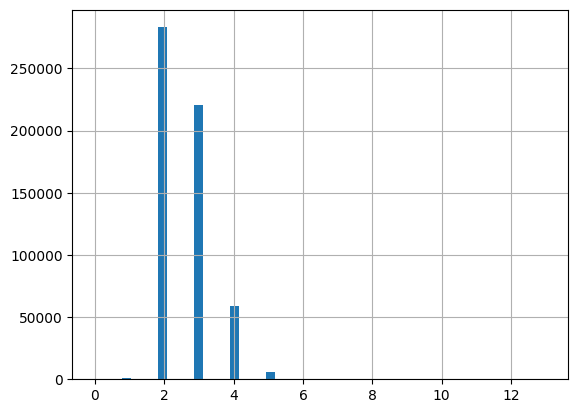

In [26]:
df_estados['sum_estados'] = df_estados[estados].sum(axis=1)
df_estados['sum_estados'].hist(bins=50)

In [27]:
df_estados[estados] = df_estados[estados].fillna(0)

values = [1,2]

df_0_between_values = pd.DataFrame()

for i in range(2,12):
    pattern_mask = (
    (df_estados[estados].isin(values) &
    df_estados[estados].shift(-1, axis=1).eq(0) &
    df_estados[estados].shift(-i, axis=1).isin(values)).any(axis=1))

    df_0_between_values = pd.concat([df_0_between_values, df_estados[pattern_mask]])

df_0_between_values = df_0_between_values[~df_0_between_values.index.duplicated(keep='first')]
df_0_between_values

,estado_fenologico_1,estado_fenologico_2,estado_fenologico_3,estado_fenologico_4,estado_fenologico_5,estado_fenologico_6,estado_fenologico_7,estado_fenologico_8,estado_fenologico_9,estado_fenologico_10,estado_fenologico_11,estado_fenologico_12,estado_fenologico_13,estado_fenologico_14,count_1s,count_2s,sum_estados
7529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1,1,3.0
23864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1,1,3.0
26009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1,1,3.0
26266,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,3.0
29287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,1,3.0
145604,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,1,3.0
159045,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2,1,4.0
460411,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,1,3.0
